# Первая часть. Исследование

In [315]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [316]:
data = pd.read_csv('./train.csv') # заводим dataframe для наших тренировочных данных

In [317]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

target_col = 'Churn' 

In [318]:
data.info() # анализируем количество строк у каждого признака и его Dtype
data.head() # смотрим на случайные строчки в датасете (в нашем случае - это первые 5, можно было посмотреть и последние 5 с помощью data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0



**Nan'ов** в нашей таблице, к счастью не обнаружилось

Однако видим, что у столбца **TotalSpent** (общая сумма, которую клиент заплатил) *Dtype* это *object*, что неверно, так как этот признак является численным

Необходимо тип данных этого столбца преобразовать в float64, воспользуемся методом **pd.to_numeric()**

In [319]:
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])

ValueError: ignored

Обнаруживается, что в столбце "TotalSpent" у нас есть ячейки с "мусором" в виде значений с пробелами. 

Определим, сколько таких ячеек в столбце. Если их окажется не много - то заменим эти значения на нули, так как в таком случае на наших данных это не отразится слишком критически

In [320]:
data["TotalSpent"].value_counts()

20.2       9
           9
19.75      8
19.65      6
20.05      6
          ..
1032       1
6215.35    1
239        1
6110.75    1
113.55     1
Name: TotalSpent, Length: 4978, dtype: int64

In [321]:
# Таких строк оказалось всего 9 штук, поэтому заменим пропуски на '0'

data['TotalSpent'] = np.where(data['TotalSpent'] == ' ', '0', data['TotalSpent'])

# Уже теперь преобразуем данные из столбца "TotalSpent" в тип float64

data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])

# Убедимся, что в нашей таблице все-таки нет nan'ов, построив табличку с количеством nan в каждой колонке.

pd.DataFrame(data.isna().sum(), columns = ["Number on Nan's"])

,Number on Nan's
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


# Анализ численных признаков


Построим гистограммы численных признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab9ac81650>,
      dtype=object)

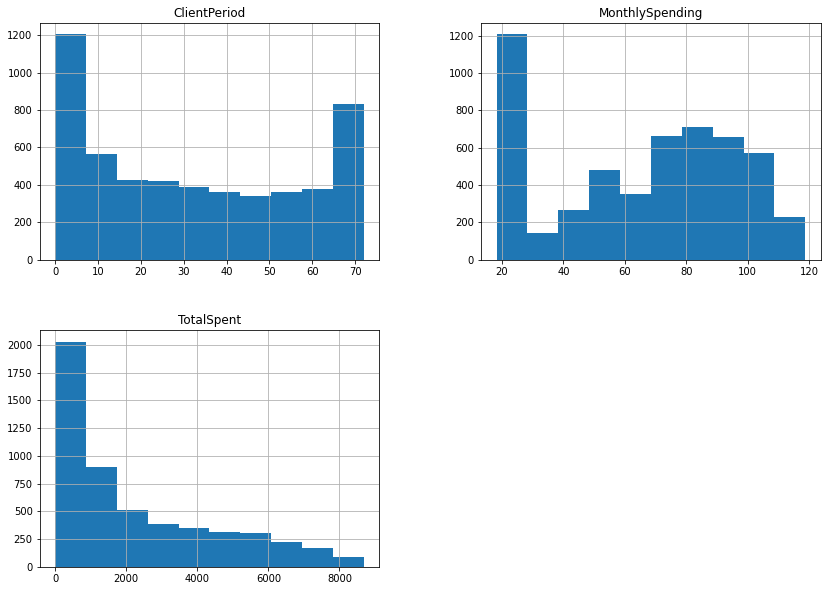

In [322]:
data[num_cols].hist(figsize = (14,10))

Анализируя гистограммы, можно сказать, что какие-либо существенные выбросы, которые бы "ломали" нашу модель отсутствуют, следовательно, с числовыми признаками производить какую-либо очистку данных не требуется

#Анализ категориальных признаков


Посмотрим на *.value_counts()* для каждого категориального признака. Зачем? Иногда бывает так, что в столбце может быть только одно уникальное значение, следовательно, этот столбец является "фиктивной переменной", которая не влияет на итоговое решение клиента, воспользуемся циклом *for col in cat_cols:*

In [323]:
for col in cat_cols:
    print(data[col].value_counts())
    print()

Male      2655
Female    2627
Name: Sex, dtype: int64

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

No     2705
Yes    2577
Name: HasPartner, dtype: int64

No     3676
Yes    1606
Name: HasChild, dtype: int64

Yes    4761
No      521
Name: HasPhoneService, dtype: int64

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: in

Мы убедились, что каждый из категориальных признаков имеет больше одного уникального значения, значит все они могут повлиять на нашу модель. 

Теперь посмотрим на распределение величин категориальных признаков. С помощью seaborn.countplot() можем увидеть и их связь с тем, ушел ли клиент или остался (то есть с целевой переменной)




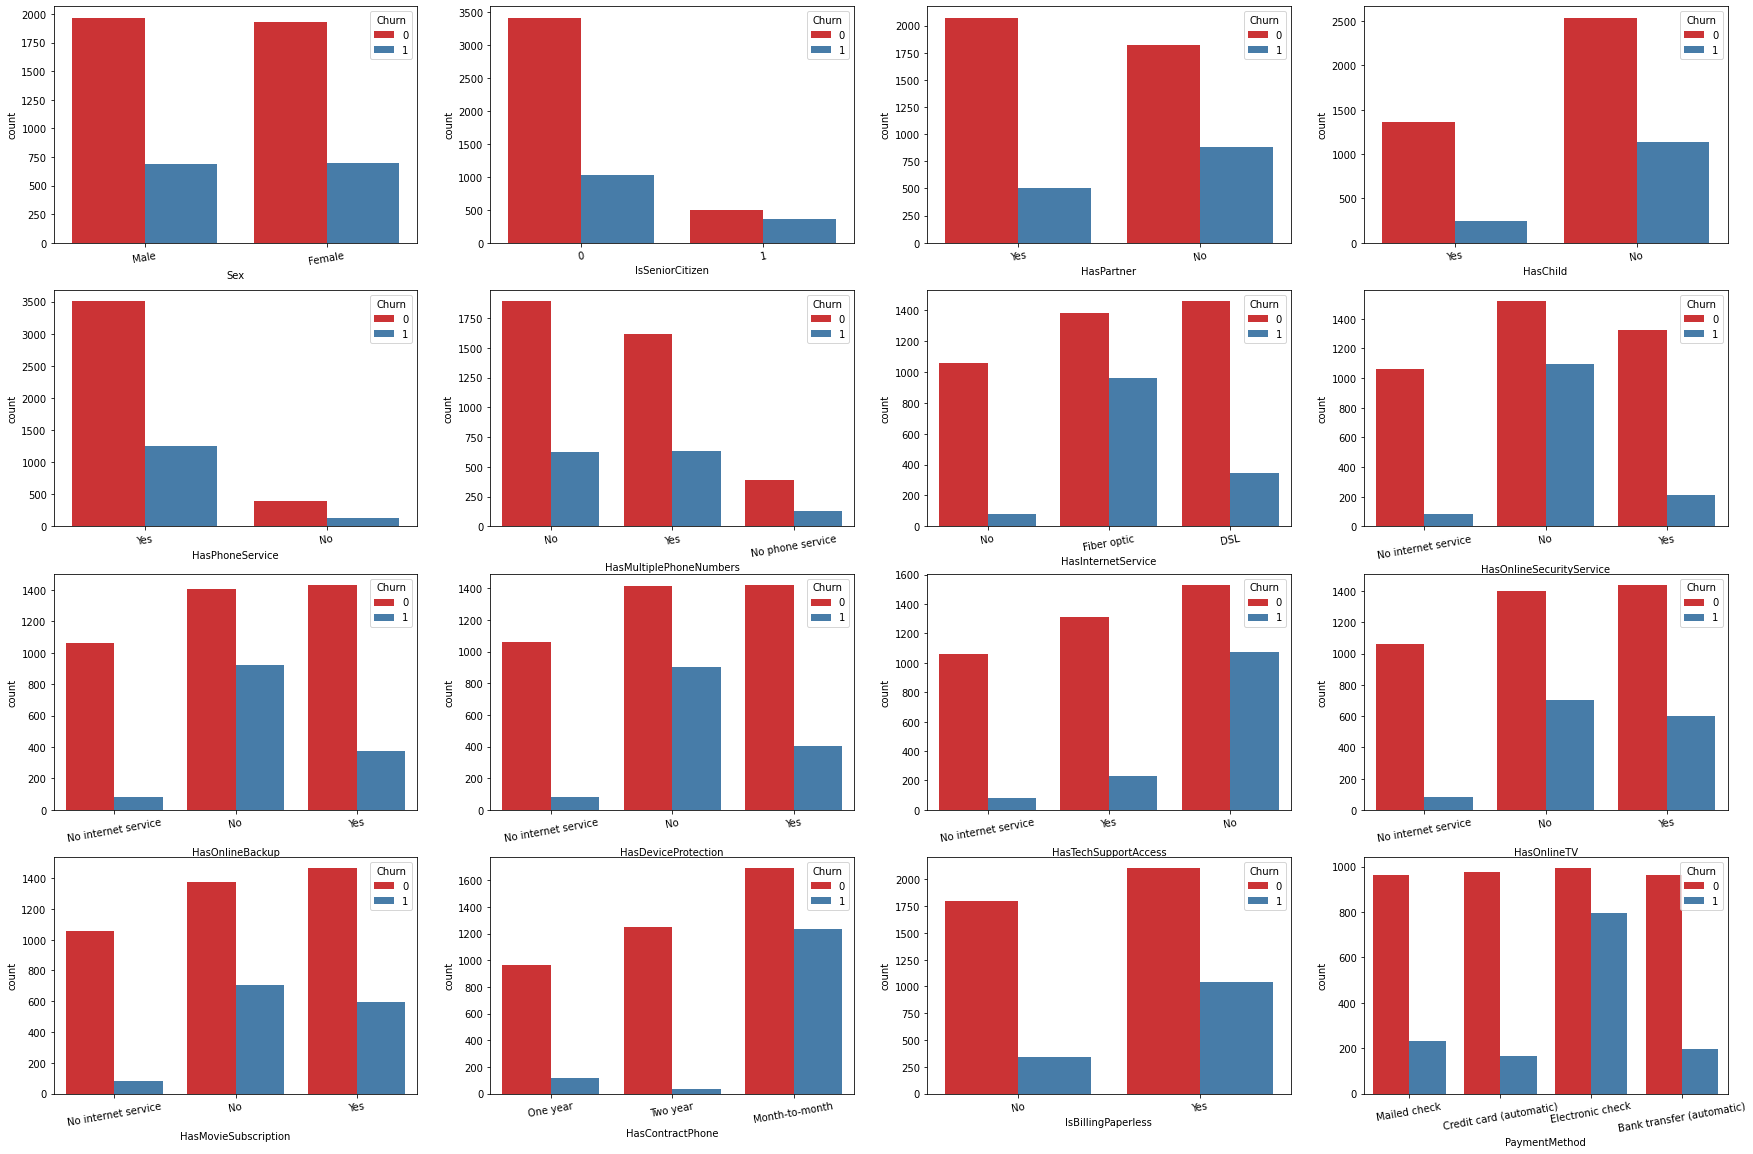

In [324]:
import seaborn as sns

plt.figure(figsize = (30,20))
index_of_plot = 0 
for col in cat_cols:
  index_of_plot += 1
  plt.subplot(4, 4, index_of_plot) 
  sns.countplot(x = data[col], hue = "Churn", data = data, palette="Set1") 
  plt.xticks(rotation = 10) 

Из построенных гистограмм можно увидеть, что некоторые категориальные признаки (isBillingPaperless, PaymentMethod, HasTechSupportAccess, HasOnlineBackup, HasOnlineSecurityService, HasInternetService) коррелируют с решением клиента уйти или остаться, следовательно, они важны для нашего анализа

Осталось посмотреть лишь на распределение целевой переменной


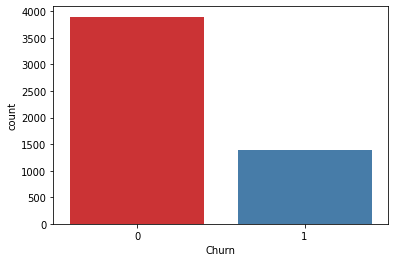

In [325]:
sns.countplot(x = 'Churn', data = data, palette="Set1")

Из гистограммы становится понятно, что доля пользователей, которые ушли - примерно четвертая часть от всех пользователей. Это может говорить лишь о совсем небольшом дисбалансе данных, то есть эти классы нельзя назвать несбалансированными


# Применение линейных моделей

In [326]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

## Произведем one-hot-encoding для категориальных признаков и стандартизацию наших данных. Затем обучим модель с помощью LogisticRegression() и подберём лучшие параметры с помощью GridSearchCV()

In [327]:
X_origin = data.iloc[:, :-1] # запоминаем на всякий случай изначальный датасет

dummy_features = pd.get_dummies(data[cat_cols]) # one-hot-encoding для категориальных признаков

X = pd.concat([data[num_cols], dummy_features], axis=1) # склеиваем числовые и категориальные признаки в один датафрейм признаков
y = data[target_col] # вектор правильных ответов

X.head() # посмотрим на верх нашего нового датафрейма и убедимся, что все получилось

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [328]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42) # Делим выборку на обучающую и тестовую

scaler = StandardScaler().fit(X_train) # задаем функцию стандартизации данных
X_train_scaled = scaler.transform(X_train) # стандартизиуем данные у X_train

In [335]:
fold = KFold(shuffle=True, random_state=777) # создаем наши фолды

param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001]
} # создаем список, по которому будет идти поиск лучшего гиперпараметра C

clf = LogisticRegression() # наша модель - Логистическая регрессия

gs = GridSearchCV(clf, param_grid = param_grid, scoring='roc_auc', cv = fold, n_jobs = -1)
gs.fit(X_train_scaled, y_train)  # производим перебор гипер параметров с помощью GridSearchCV и обучаем модель

print ('gs.best_score_:', gs.best_score_) # выводим скор (метрика = roc_auc), который получился при обучении на train выборке
print ('gs.best_params_:', gs.best_params_) # выводим значение параметра С, которое получилось при обучении на train выборке

gs.best_score_: 0.8479583010447034
gs.best_params_: {'C': 1}


In [334]:
# проверяем нашу модель на переобучение на тестовой выборке

X_test_scaled = scaler.transform(X_test) # стандартизиуем данные у X_test

y_test_pred = gs.predict_proba(X_test_scaled)[:, 1] # предсказания модели на тестовой выборке

roc_auc_score(y_test, y_test_pred) # выводим скор (метрика = roc_auc) на тестовой выборке

# значения roc_auc_score у train и test выборки примерно равны, что значит, что наша модель не переобучилась и все прошло удачно

0.8284509747785853

**Лучшее качество, которое удалось получить на тестовой выборке - roc_auc_score = 0.8284509747785853** 

**Лучшее значение гиперпараметра C получилось {'C': 1}** 



# Catboost

In [336]:
import catboost

In [338]:
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_origin, y, train_size=0.8, random_state=42) # Делим датасет на обучающую и тестовую выборки

boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features = cat_cols)

boosting_model.fit(X_train_origin, y_train_origin, cat_features = cat_cols) # Обучаем модель

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

print("train_roc_auc_score:", roc_auc_score(y_train_origin, y_train_predicted))
print("test_roc_auc_score:", roc_auc_score(y_test_origin, y_test_predicted))

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 14.9ms	remaining: 2.97s
1:	learn: 0.5970973	total: 27.8ms	remaining: 2.75s
2:	learn: 0.5610080	total: 40.8ms	remaining: 2.68s
3:	learn: 0.5329491	total: 53.7ms	remaining: 2.63s
4:	learn: 0.5112068	total: 68.2ms	remaining: 2.66s
5:	learn: 0.4930985	total: 81.5ms	remaining: 2.63s
6:	learn: 0.4800850	total: 93ms	remaining: 2.56s
7:	learn: 0.4681540	total: 107ms	remaining: 2.57s
8:	learn: 0.4583285	total: 120ms	remaining: 2.54s
9:	learn: 0.4494858	total: 135ms	remaining: 2.56s
10:	learn: 0.4439489	total: 146ms	remaining: 2.51s
11:	learn: 0.4371125	total: 162ms	remaining: 2.54s
12:	learn: 0.4311122	total: 179ms	remaining: 2.58s
13:	learn: 0.4264039	total: 193ms	remaining: 2.57s
14:	learn: 0.4222915	total: 211ms	remaining: 2.6s
15:	learn: 0.4190003	total: 225ms	remaining: 2.59s
16:	learn: 0.4153313	total: 238ms	remaining: 2.57s
17:	learn: 0.4132986	total: 250ms	remaining: 2.52s
18:	learn: 0.4116653	total: 261ms	remaining: 2.49s
19:	lea

Скор, который получается у CatBoost - **0.8228013224850159**

# Предсказания

In [339]:
best_model = gs

In [340]:
X1_test = pd.read_csv('./test.csv')

X1_test['TotalSpent'] = np.where(X1_test['TotalSpent'] == ' ', '0', X1_test['TotalSpent'])
X1_test['TotalSpent'] = pd.to_numeric(X1_test['TotalSpent'])

X1 = pd.concat([X1_test[num_cols], pd.get_dummies(X1_test[cat_cols])], axis=1)
X1_test_scaled = scaler.transform(X1)

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X1_test_scaled)[:, 1]
submission.to_csv('./my_submission.csv', index = False)